In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

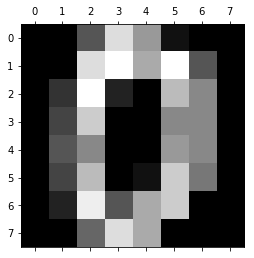

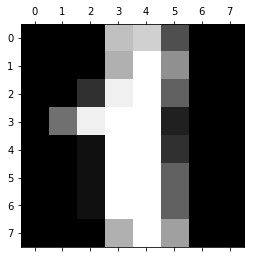

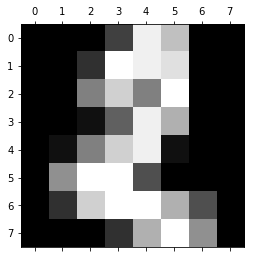

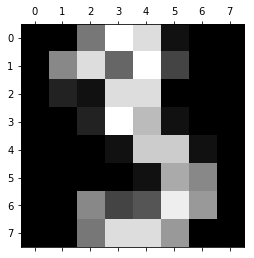

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'),df.target, test_size=0.2)

In [16]:
from sklearn.ensemble import RandomForestClassifier
## we can tune the model by changing or tweaking the value of n_estimators
model = RandomForestClassifier()

In [17]:
model.fit(x_train,y_train)

C:\Users\lenovo pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
model.score(x_test, y_test)

0.9583333333333334

In [19]:
y_predicted = model.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 26,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  1, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  2,  1,  1,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  0, 32]], dtype=int64)

Text(69.0, 0.5, 'Truth')

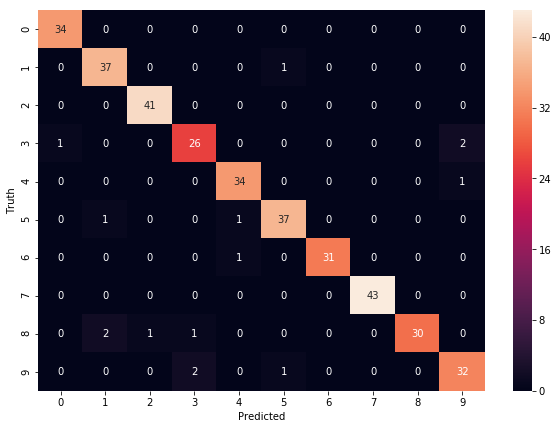

In [23]:
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline
plt.figure(figsize=(10,7))
sbn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Excercise

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()

In [25]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [43]:
from sklearn.ensemble import RandomForestClassifier
ex_model = RandomForestClassifier(n_estimators=30)

In [44]:
ex_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
ex_model.score(x_test, y_test)

1.0

### Show the wrong predictions on the confusion matrix

In [46]:
ex_y_predicted = ex_model.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ex_y_predicted)
cm

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Predicted')

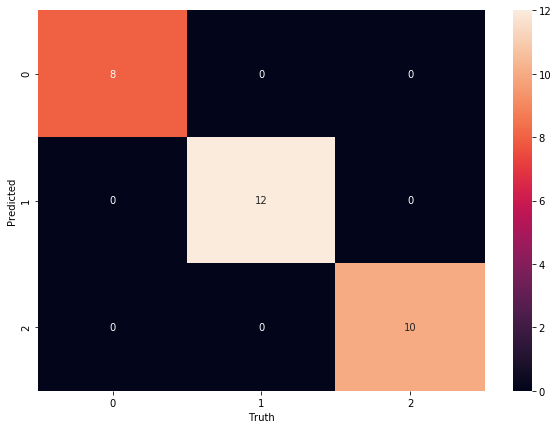

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
plt.figure(figsize=(10,7))
sbn.heatmap(cm, annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')